In [528]:
# import 구문 정렬
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from scipy.io import arff
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.activations import swish
from tensorflow.keras.layers import (LeakyReLU, Activation, Conv1D, MaxPooling1D, Flatten, Dense, 
                                    BatchNormalization, ReLU, GlobalAveragePooling1D, Dropout, 
                                    GlobalMaxPooling1D)
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import auc, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Plotting settings
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # minus 표시


In [529]:
summary_df = pd.read_csv('./cnc_data/train.csv')
summary_df

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,aluminum,6,4.0,unworn,yes,yes
1,2,aluminum,20,4.0,unworn,yes,yes
2,3,aluminum,6,3.0,unworn,yes,yes
3,4,aluminum,6,2.5,unworn,no,NaN
4,5,aluminum,20,3.0,unworn,no,NaN
5,6,aluminum,6,4.0,worn,yes,no
6,7,aluminum,20,4.0,worn,no,NaN
7,8,aluminum,20,4.0,worn,yes,no
8,9,aluminum,15,4.0,worn,yes,no
9,10,aluminum,12,4.0,worn,yes,no


In [530]:
import glob

all_files = glob.glob('./cnc_data/*.csv')
all_files = all_files[:-1] # train.csv 파일은 삭제
all_files.sort() # 파일 이름순으로 정렬
all_files


['./cnc_data/experiment_01.csv',
 './cnc_data/experiment_02.csv',
 './cnc_data/experiment_03.csv',
 './cnc_data/experiment_04.csv',
 './cnc_data/experiment_05.csv',
 './cnc_data/experiment_06.csv',
 './cnc_data/experiment_07.csv',
 './cnc_data/experiment_08.csv',
 './cnc_data/experiment_09.csv',
 './cnc_data/experiment_10.csv',
 './cnc_data/experiment_11.csv',
 './cnc_data/experiment_12.csv',
 './cnc_data/experiment_13.csv',
 './cnc_data/experiment_14.csv',
 './cnc_data/experiment_15.csv',
 './cnc_data/experiment_16.csv',
 './cnc_data/experiment_17.csv',
 './cnc_data/experiment_18.csv',
 './cnc_data/experiment_19.csv',
 './cnc_data/experiment_20.csv',
 './cnc_data/experiment_21.csv',
 './cnc_data/experiment_22.csv',
 './cnc_data/experiment_23.csv',
 './cnc_data/experiment_24.csv',
 './cnc_data/experiment_25.csv']

In [531]:
# df_list = []
# for i in range(len(summary_df)):
#     df_list.append(f'df_{i+1}')
    
# df_list

In [532]:
for i, file in enumerate(all_files) :
    print(i, file)

0 ./cnc_data/experiment_01.csv
1 ./cnc_data/experiment_02.csv
2 ./cnc_data/experiment_03.csv
3 ./cnc_data/experiment_04.csv
4 ./cnc_data/experiment_05.csv
5 ./cnc_data/experiment_06.csv
6 ./cnc_data/experiment_07.csv
7 ./cnc_data/experiment_08.csv
8 ./cnc_data/experiment_09.csv
9 ./cnc_data/experiment_10.csv
10 ./cnc_data/experiment_11.csv
11 ./cnc_data/experiment_12.csv
12 ./cnc_data/experiment_13.csv
13 ./cnc_data/experiment_14.csv
14 ./cnc_data/experiment_15.csv
15 ./cnc_data/experiment_16.csv
16 ./cnc_data/experiment_17.csv
17 ./cnc_data/experiment_18.csv
18 ./cnc_data/experiment_19.csv
19 ./cnc_data/experiment_20.csv
20 ./cnc_data/experiment_21.csv
21 ./cnc_data/experiment_22.csv
22 ./cnc_data/experiment_23.csv
23 ./cnc_data/experiment_24.csv
24 ./cnc_data/experiment_25.csv


In [533]:
df_list = []
for i, file in enumerate(all_files):
    df_list.append(pd.read_csv(file))

In [534]:

len(df_list)
type(df_list)
type(df_list[0])
df_list_len = []
for i in range(len(df_list)):
    df_list_len.append(df_list[i].shape[0])
    
sum_size = sum(df_list_len)
sum_size
df_list_len

[1055,
 1668,
 1521,
 532,
 462,
 1296,
 565,
 605,
 740,
 1301,
 2314,
 2276,
 2233,
 2332,
 1381,
 602,
 2150,
 2253,
 565,
 605,
 1668,
 565,
 462,
 2332,
 565]

In [535]:
summary_df2 = summary_df.copy()
summary_df2.passed_visual_inspection.fillna('no', inplace=True)
summary_df2['df_len'] = df_list_len
summary_df2

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection,df_len
0,1,aluminum,6,4.0,unworn,yes,yes,1055
1,2,aluminum,20,4.0,unworn,yes,yes,1668
2,3,aluminum,6,3.0,unworn,yes,yes,1521
3,4,aluminum,6,2.5,unworn,no,no,532
4,5,aluminum,20,3.0,unworn,no,no,462
5,6,aluminum,6,4.0,worn,yes,no,1296
6,7,aluminum,20,4.0,worn,no,no,565
7,8,aluminum,20,4.0,worn,yes,no,605
8,9,aluminum,15,4.0,worn,yes,no,740
9,10,aluminum,12,4.0,worn,yes,no,1301


In [536]:
summary_df2.df_len.sum()

32048

In [537]:
summary_df2.groupby(['machining_finalized', 'passed_visual_inspection']).sum()

/var/folders/vf/j0dck67d0j1dpgnk9c8mynz00000gn/T/ipykernel_54876/1899896733.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_df2.groupby(['machining_finalized', 'passed_visual_inspection']).sum()


No  feedrate  clamp_pressure  \
machining_finalized passed_visual_inspection                                  
no                  no                         75        81            20.5   
yes                 no                         73        71            24.0   
                    yes                       177        85            41.5   

                                              df_len  
machining_finalized passed_visual_inspection          
no                  no                          3228  
yes                 no                          6175  
                    yes                        22645

In [538]:
pd.DataFrame([summary_df2.iloc[0,:]]*summary_df2.df_len[0])

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection,df_len
0,1,aluminum,6,4.0,unworn,yes,yes,1055
0,1,aluminum,6,4.0,unworn,yes,yes,1055
0,1,aluminum,6,4.0,unworn,yes,yes,1055
0,1,aluminum,6,4.0,unworn,yes,yes,1055
0,1,aluminum,6,4.0,unworn,yes,yes,1055
...,...,...,...,...,...,...,...,...
0,1,aluminum,6,4.0,unworn,yes,yes,1055
0,1,aluminum,6,4.0,unworn,yes,yes,1055
0,1,aluminum,6,4.0,unworn,yes,yes,1055
0,1,aluminum,6,4.0,unworn,yes,yes,1055


In [539]:
len(df_list[0])
df_list[0]

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,202,4.000,4.00,202,4.0,4.000000,0.18,0.0207,329,2.77,...,0.5240,2.740000e-19,329,0.0,6.960000e-07,16,1,0,50,Starting
1,202,-6.800,-346.00,202,-9.6,-354.000000,-10.90,0.1860,328,23.30,...,-0.2880,2.740000e-19,328,0.0,-5.270000e-07,16,1,4,50,Prep
2,200,-13.800,-2.25,200,-13.9,3.999905,-8.59,0.1400,328,30.60,...,0.5240,2.740000e-19,328,0.0,9.100000e-07,16,1,7,50,Prep
3,198,-14.000,4.00,198,-13.9,3.999905,-6.11,0.1300,327,30.30,...,-0.1800,2.740000e-19,328,0.0,1.070000e-06,16,1,7,50,Prep
4,197,-13.900,-14.80,196,-13.9,4.000095,-5.70,0.1140,328,30.50,...,0.2260,2.740000e-19,328,0.0,1.960000e-06,16,1,7,50,Prep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,145,4.175,91.50,145,4.0,4.000000,-2.84,0.0522,325,7.39,...,20.5000,9.310000e-01,319,118.0,1.790000e-01,16,1,132,50,end
1051,145,3.850,-83.50,145,4.0,4.000000,-1.85,0.0522,325,2.69,...,15.8000,7.200000e-01,319,117.0,1.380000e-01,16,1,132,50,end
1052,145,3.825,-83.50,145,4.0,4.000000,-2.20,0.0527,325,2.22,...,24.3000,1.000000e+00,318,120.0,1.920000e-01,16,1,132,50,end
1053,145,4.150,91.50,145,4.0,4.000000,-4.02,0.0502,326,5.80,...,22.4000,9.290000e-01,321,120.0,1.780000e-01,16,1,132,50,end


In [540]:
# df_list_add = []
# add_df = pd.DataFrame([summary_df2.iloc[0,:]] * len(df_list[0])).reset_index(drop=True)
# df_list_add.append(pd.concat([df_list[0], add_df], axis=1))
# df_list_add[0]

In [541]:
df_list_add = []
for i in range(len(df_list)):
    add_df = pd.DataFrame([summary_df2.iloc[i,:]] * len(df_list[i])).reset_index(drop=True)
    df_list_add.append(pd.concat([df_list[i], add_df], axis=1))
    print(df_list_add[i].shape)

(1055, 56)


(1668, 56)
(1521, 56)
(532, 56)
(462, 56)
(1296, 56)
(565, 56)
(605, 56)
(740, 56)
(1301, 56)
(2314, 56)
(2276, 56)
(2233, 56)
(2332, 56)
(1381, 56)
(602, 56)
(2150, 56)
(2253, 56)
(565, 56)
(605, 56)
(1668, 56)
(565, 56)
(462, 56)
(2332, 56)
(565, 56)


In [542]:
for i in range(len(df_list)):
    print(df_list[i].shape)

(1055, 48)
(1668, 48)
(1521, 48)
(532, 48)
(462, 48)
(1296, 48)
(565, 48)
(605, 48)
(740, 48)
(1301, 48)
(2314, 48)
(2276, 48)
(2233, 48)
(2332, 48)
(1381, 48)
(602, 48)
(2150, 48)
(2253, 48)
(565, 48)
(605, 48)
(1668, 48)
(565, 48)
(462, 48)
(2332, 48)
(565, 48)


In [543]:
concat_df = pd.DataFrame()
for i in range(len(df_list)):
    concat_df = pd.concat([concat_df, df_list_add[i]])
    print(concat_df.shape)

(1055, 56)
(2723, 56)
(4244, 56)
(4776, 56)
(5238, 56)
(6534, 56)
(7099, 56)
(7704, 56)
(8444, 56)
(9745, 56)
(12059, 56)
(14335, 56)
(16568, 56)
(18900, 56)
(20281, 56)
(20883, 56)
(23033, 56)
(25286, 56)
(25851, 56)
(26456, 56)
(28124, 56)
(28689, 56)
(29151, 56)
(31483, 56)
(32048, 56)


In [544]:
concat_df.reset_index(drop=True, inplace=True)
concat_df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,M_CURRENT_FEEDRATE,Machining_Process,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection,df_len
0,202.0,4.0000,4.00,202.0,4.0,4.000000,0.180,0.0207,329,2.77,...,50,Starting,1,aluminum,6,4.0,unworn,yes,yes,1055
1,202.0,-6.8000,-346.00,202.0,-9.6,-354.000000,-10.900,0.1860,328,23.30,...,50,Prep,1,aluminum,6,4.0,unworn,yes,yes,1055
2,200.0,-13.8000,-2.25,200.0,-13.9,3.999905,-8.590,0.1400,328,30.60,...,50,Prep,1,aluminum,6,4.0,unworn,yes,yes,1055
3,198.0,-14.0000,4.00,198.0,-13.9,3.999905,-6.110,0.1300,327,30.30,...,50,Prep,1,aluminum,6,4.0,unworn,yes,yes,1055
4,197.0,-13.9000,-14.80,196.0,-13.9,4.000095,-5.700,0.1140,328,30.50,...,50,Prep,1,aluminum,6,4.0,unworn,yes,yes,1055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32043,179.0,3.5625,8.15,179.0,3.5,5.000000,-0.941,0.0215,328,1.79,...,20,End,25,aluminum,6,2.5,worn,yes,yes,565
32044,178.5,3.5350,30.00,178.5,3.5,5.000000,-0.780,0.0202,328,1.07,...,20,End,25,aluminum,6,2.5,worn,yes,yes,565
32045,178.5,3.5475,17.50,178.5,3.5,5.000000,0.501,0.0190,328,0.99,...,20,End,25,aluminum,6,2.5,worn,yes,yes,565
32046,178.5,3.4475,11.25,178.5,3.5,5.000000,-0.298,0.0193,328,1.37,...,20,End,25,aluminum,6,2.5,worn,yes,yes,565


In [545]:
concat_df.passed_visual_inspection.value_counts()

yes    22645
no      9403
Name: passed_visual_inspection, dtype: int64

In [546]:
concat_df.columns

Index(['X_ActualPosition', 'X_ActualVelocity', 'X_ActualAcceleration',
       'X_SetPosition', 'X_SetVelocity', 'X_SetAcceleration',
       'X_CurrentFeedback', 'X_DCBusVoltage', 'X_OutputCurrent',
       'X_OutputVoltage', 'X_OutputPower', 'Y_ActualPosition',
       'Y_ActualVelocity', 'Y_ActualAcceleration', 'Y_SetPosition',
       'Y_SetVelocity', 'Y_SetAcceleration', 'Y_CurrentFeedback',
       'Y_DCBusVoltage', 'Y_OutputCurrent', 'Y_OutputVoltage', 'Y_OutputPower',
       'Z_ActualPosition', 'Z_ActualVelocity', 'Z_ActualAcceleration',
       'Z_SetPosition', 'Z_SetVelocity', 'Z_SetAcceleration',
       'Z_CurrentFeedback', 'Z_DCBusVoltage', 'Z_OutputCurrent',
       'Z_OutputVoltage', 'S_ActualPosition', 'S_ActualVelocity',
       'S_ActualAcceleration', 'S_SetPosition', 'S_SetVelocity',
       'S_SetAcceleration', 'S_CurrentFeedback', 'S_DCBusVoltage',
       'S_OutputCurrent', 'S_OutputVoltage', 'S_OutputPower',
       'S_SystemInertia', 'M_CURRENT_PROGRAM_NUMBER', 'M_sequence_n

In [547]:
concat_df.columns[0]

'X_ActualPosition'

In [548]:
for i in range(len(concat_df.columns)):
    print(concat_df.columns[i])
    print(concat_df[concat_df.columns[i]].unique())

X_ActualPosition
[202.  200.  198.  197.  195.  193.  191.  189.  188.  186.  184.  182.
 180.  179.  177.  175.  173.  171.  170.  168.  166.  164.  162.  161.
 159.  157.  155.  154.  153.  152.  151.  150.  149.  148.  147.  146.
 145.  156.  158.  160.  163.  165.  172.  201.  199.  192.  190.  183.
 181.  174.  144.  187.  178.  176.  169.  167.  196.  194.  185.  203.
 176.5 165.5 163.5 162.5 161.5 183.5 179.5 153.5 152.5 149.5 148.5 147.5
 146.5 156.5 157.5 154.5 174.5 178.5 150.5 155.5 158.5 182.5 170.5 169.5
 177.5 164.5 181.5 159.5 180.5 184.5 171.5 160.5 151.5 175.5 173.5 172.5
 145.5 144.5 168.5 166.5 200.5 199.5 167.5 185.5 201.5 193.5 192.5 195.5
 194.5 196.5]
X_ActualVelocity
[  4.      -6.8    -13.8    ...   8.275    9.4625   9.875 ]
X_ActualAcceleration
[   4.    -346.      -2.25  ...  -64.6    -52.125   76.125]
X_SetPosition
[202.  200.  198.  196.  195.  193.  191.  189.  187.  186.  184.  182.
 180.  178.  177.  175.  173.  171.  170.  168.  166.  164.  162.  161.
 

In [549]:
df = concat_df.drop(['Z_CurrentFeedback', 'Z_DCBusVoltage', 'Z_OutputCurrent',
                    'Z_OutputVoltage', 'No', 'material', 'df_len'], axis=1)

df.columns

Index(['X_ActualPosition', 'X_ActualVelocity', 'X_ActualAcceleration',
       'X_SetPosition', 'X_SetVelocity', 'X_SetAcceleration',
       'X_CurrentFeedback', 'X_DCBusVoltage', 'X_OutputCurrent',
       'X_OutputVoltage', 'X_OutputPower', 'Y_ActualPosition',
       'Y_ActualVelocity', 'Y_ActualAcceleration', 'Y_SetPosition',
       'Y_SetVelocity', 'Y_SetAcceleration', 'Y_CurrentFeedback',
       'Y_DCBusVoltage', 'Y_OutputCurrent', 'Y_OutputVoltage', 'Y_OutputPower',
       'Z_ActualPosition', 'Z_ActualVelocity', 'Z_ActualAcceleration',
       'Z_SetPosition', 'Z_SetVelocity', 'Z_SetAcceleration',
       'S_ActualPosition', 'S_ActualVelocity', 'S_ActualAcceleration',
       'S_SetPosition', 'S_SetVelocity', 'S_SetAcceleration',
       'S_CurrentFeedback', 'S_DCBusVoltage', 'S_OutputCurrent',
       'S_OutputVoltage', 'S_OutputPower', 'S_SystemInertia',
       'M_CURRENT_PROGRAM_NUMBER', 'M_sequence_number', 'M_CURRENT_FEEDRATE',
       'Machining_Process', 'feedrate', 'clamp_pressur

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32048 entries, 0 to 32047
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   X_ActualPosition          32048 non-null  float64
 1   X_ActualVelocity          32048 non-null  float64
 2   X_ActualAcceleration      32048 non-null  float64
 3   X_SetPosition             32048 non-null  float64
 4   X_SetVelocity             32048 non-null  float64
 5   X_SetAcceleration         32048 non-null  float64
 6   X_CurrentFeedback         32048 non-null  float64
 7   X_DCBusVoltage            32048 non-null  float64
 8   X_OutputCurrent           32048 non-null  int64  
 9   X_OutputVoltage           32048 non-null  float64
 10  X_OutputPower             32048 non-null  float64
 11  Y_ActualPosition          32048 non-null  float64
 12  Y_ActualVelocity          32048 non-null  float64
 13  Y_ActualAcceleration      32048 non-null  float64
 14  Y_SetP

In [551]:
df.passed_visual_inspection.replace({'yes':1, 'no':0}, inplace=True)
df.tool_condition.replace({'worn':1, 'unworn':0}, inplace=True)
df.machining_finalized.replace({'yes':1, 'no':0}, inplace=True)


In [552]:
df.Machining_Process.unique()

array(['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'end',
       'End'], dtype=object)

In [553]:
df.groupby(['passed_visual_inspection', 'Machining_Process']).count()

X_ActualPosition  \
passed_visual_inspection Machining_Process                     
0                        End                            1475   
                         Layer 1 Down                   1032   
                         Layer 1 Up                     1766   
                         Layer 2 Down                    740   
                         Layer 2 Up                     1127   
                         Layer 3 Down                    661   
                         Layer 3 Up                      620   
                         Prep                            740   
                         Repositioning                  1242   
1                        End                            1732   
                         Layer 1 Down                   2516   
                         Layer 1 Up                     3578   
                         Layer 2 Down                   2272   
                         Layer 2 Up                     2726   
                         Layer 3 Down                   2144   
                         Layer 3 Up                     2715   
                         Prep                           1654   
                         Repositioning                  3299   
                         Starting                          1   
                         end                               8   

                                            X_ActualVelocity  \
passed_visual_inspection Machining_Process                     
0                        End                            1475   
                         Layer 1 Down                   1032   
                         Layer 1 Up                     1766   
                         Layer 2 Down                    740   
                         Layer 2 Up                     1127   
                         Layer 3 Down                    661   
                         Layer 3 Up                      620   
                         Prep                            740   
                         Repositioning                  1242   
1                        End                            1732   
                         Layer 1 Down                   2516   
                         Layer 1 Up                     3578   
                         Layer 2 Down                   2272   
                         Layer 2 Up                     2726   
                         Layer 3 Down                   2144   
                         Layer 3 Up                     2715   
                         Prep                           1654   
                         Repositioning                  3299   
                         Starting                          1   
                         end                               8   

                                            X_ActualAcceleration  \
passed_visual_inspection Machining_Process                         
0                        End                                1475   
                         Layer 1 Down                       1032   
                         Layer 1 Up                         1766   
                         Layer 2 Down                        740   
                         Layer 2 Up                         1127   
                         Layer 3 Down                        661   
                         Layer 3 Up                          620   
                         Prep                                740   
                         Repositioning                      1242   
1                        End                                1732   
                         Layer 1 Down                       2516   
                         Layer 1 Up                         3578   
                         Layer 2 Down                       2272   
                         Layer 2 Up                         2726   
                         Layer 3 Down                       2144   
                         Layer 3 Up                         2715   
  

In [554]:
df_list_add[0].M_CURRENT_FEEDRATE.unique()
df_list_add[0].groupby(['M_CURRENT_FEEDRATE', 'Machining_Process']).count()
df_list_add[0].M_CURRENT_PROGRAM_NUMBER.unique()

array([1])

In [555]:
concat_df.M_CURRENT_PROGRAM_NUMBER.unique()
concat_df.groupby(['passed_visual_inspection', 'M_CURRENT_PROGRAM_NUMBER']).count()

X_ActualPosition  \
passed_visual_inspection M_CURRENT_PROGRAM_NUMBER                     
no                       0                                      705   
                         1                                     8434   
                         4                                      264   
yes                      0                                      705   
                         1                                    21676   
                         4                                      264   

                                                   X_ActualVelocity  \
passed_visual_inspection M_CURRENT_PROGRAM_NUMBER                     
no                       0                                      705   
                         1                                     8434   
                         4                                      264   
yes                      0                                      705   
                         1                                    21676   
                         4                                      264   

                                                   X_ActualAcceleration  \
passed_visual_inspection M_CURRENT_PROGRAM_NUMBER                         
no                       0                                          705   
                         1                                         8434   
                         4                                          264   
yes                      0                                          705   
                         1                                        21676   
                         4                                          264   

                                                   X_SetPosition  \
passed_visual_inspection M_CURRENT_PROGRAM_NUMBER                  
no                       0                                   705   
                         1                                  8434   
                         4                                   264   
yes                      0                                   705   
                         1                                 21676   
                         4                                   264   

                                                   X_SetVelocity  \
passed_visual_inspection M_CURRENT_PROGRAM_NUMBER                  
no                       0                                   705   
                         1                                  8434   
                         4                                   264   
yes                      0                                   705   
                         1                                 21676   
                         4                                   264   

                                                   X_SetAcceleration  \
passed_visual_inspection M_CURRENT_PROGRAM_NUMBER                      
no                       0                                       705   
                         1                                      8434   
                         4                                       264   
yes                      0                                       705   
                         1                                     21676   
                         4                                       264   

                                                   X_CurrentFeedback  \
passed_visual_inspection M_CURRENT_PROGRAM_NUMBER                      
no                       0                                       705   
                         1                                      8434   
                         4                                       264   
yes                      0                                       705   
                         1                                     21676   
                         4                                       264   

                                                   X_DCBusVoltage  \

In [556]:
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,202.0,4.0000,4.00,202.0,4.0,4.000000,0.180,0.0207,329,2.77,...,16.0,1,0,50,Starting,6,4.0,0,1,1
1,202.0,-6.8000,-346.00,202.0,-9.6,-354.000000,-10.900,0.1860,328,23.30,...,16.0,1,4,50,Prep,6,4.0,0,1,1
2,200.0,-13.8000,-2.25,200.0,-13.9,3.999905,-8.590,0.1400,328,30.60,...,16.0,1,7,50,Prep,6,4.0,0,1,1
3,198.0,-14.0000,4.00,198.0,-13.9,3.999905,-6.110,0.1300,327,30.30,...,16.0,1,7,50,Prep,6,4.0,0,1,1
4,197.0,-13.9000,-14.80,196.0,-13.9,4.000095,-5.700,0.1140,328,30.50,...,16.0,1,7,50,Prep,6,4.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32043,179.0,3.5625,8.15,179.0,3.5,5.000000,-0.941,0.0215,328,1.79,...,17.0,1,0,20,End,6,2.5,1,1,1
32044,178.5,3.5350,30.00,178.5,3.5,5.000000,-0.780,0.0202,328,1.07,...,17.0,1,0,20,End,6,2.5,1,1,1
32045,178.5,3.5475,17.50,178.5,3.5,5.000000,0.501,0.0190,328,0.99,...,17.0,1,0,20,End,6,2.5,1,1,1
32046,178.5,3.4475,11.25,178.5,3.5,5.000000,-0.298,0.0193,328,1.37,...,17.0,1,0,20,End,6,2.5,1,1,1


In [557]:
# M_sequence_number가 작으면 ng, 크면 ok
# -> 숫자의 크기가 결과에 영향을 주니까 원핫인코딩 하면 안된다? -> 일단 이걸로...
# -> 설비 설정값 또는 측정값이 아니므로 삭제?
# -> 원핫인코딩 처리하면 크기가 너무 커짐 (135가지)
# -> 주석은 '실행 중인 G-code 라인' 으로 되어 있음
df.M_sequence_number.value_counts()
df.groupby(['passed_visual_inspection', 'M_sequence_number']).count()

X_ActualPosition  \
passed_visual_inspection M_sequence_number                     
0                        0                              4491   
                         1                                 3   
                         2                               975   
                         4                                 2   
                         5                                 3   
...                                                      ...   
1                        131                              39   
                         132                              29   
                         133                               2   
                         134                               2   
                         135                               1   

                                            X_ActualVelocity  \
passed_visual_inspection M_sequence_number                     
0                        0                              4491   
                         1                                 3   
                         2                               975   
                         4                                 2   
                         5                                 3   
...                                                      ...   
1                        131                              39   
                         132                              29   
                         133                               2   
                         134                               2   
                         135                               1   

                                            X_ActualAcceleration  \
passed_visual_inspection M_sequence_number                         
0                        0                                  4491   
                         1                                     3   
                         2                                   975   
                         4                                     2   
                         5                                     3   
...                                                          ...   
1                        131                                  39   
                         132                                  29   
                         133                                   2   
                         134                                   2   
                         135                                   1   

                                            X_SetPosition  X_SetVelocity  \
passed_visual_inspection M_sequence_number                                 
0                        0                           4491           4491   
                         1                              3              3   
                         2                            975            975   
                         4                              2              2   
                         5                              3              3   
...                                                   ...            ...   
1                        131                           39             39   
                         132                           29             29   
                         133                            2              2   
                         134                            2              2   
                         135                            1              1   

                                            X_SetAcceleration  \
passed_visual_inspection M_sequence_number                      
0                        0                               4491   
                         1                                  3   
                         2                                975   
                         4                                  2   
                         5                                  3   
...                                              

In [558]:
print(df.M_CURRENT_PROGRAM_NUMBER.unique())
print(df.Machining_Process.unique())
print(df.M_sequence_number.unique())
len(df.M_sequence_number.unique())


[1 0 4]
['Starting' 'Prep' 'Layer 1 Up' 'Layer 1 Down' 'Repositioning'
 'Layer 2 Up' 'Layer 2 Down' 'Layer 3 Up' 'Layer 3 Down' 'end' 'End']
[  0   4   7   2   9  12  14  15  17  19  21  23  25  26  27  29  31  32
  34  35  37  38  39  40  41  43  44  45  47  48  51  52  54  55  57  59
  61  63  65  66  67  68  70  72  73  75  77  79  81  82  84  86  88  89
  91  94  95  97  99 100 102 104 106 107 108 109 111 113 115 117 119 120
 121 122 123 125 126 127 128 130 132  56  58  76  78  20  22  24  62  64
  60  80  33 105  42  83  85  87 124 101 103  36  18  13  16  53  28  74
 134  90  46 118  96 110 129 112 114  10  98 116   5   1   6  30 131  69
  49  50  92  71  93 135 133   8   3]


135

In [559]:
# 원핫인코딩 : 'M_CURRENT_PROGRAM_NUMBER', 'Machining_Process'
# 원핫인코딩 후 2개 열 삭제
print(df.shape)
dum_program_num = pd.get_dummies(df.M_CURRENT_PROGRAM_NUMBER, prefix='p_num')
print(dum_program_num.shape)
dum_process_num = pd.get_dummies(df.Machining_Process, prefix='process')
print(dum_process_num.shape)
df = pd.concat([df, dum_process_num, dum_program_num], axis=1)
print(df.shape)
df.drop(['M_CURRENT_PROGRAM_NUMBER', 'Machining_Process'], axis=1, inplace=True)
print(df.shape)

(32048, 49)
(32048, 3)
(32048, 11)
(32048, 63)
(32048, 61)


In [560]:
# 라벨 열 이름 바꾸기
df.rename(columns={'passed_visual_inspection' : 'target'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32048 entries, 0 to 32047
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_ActualPosition       32048 non-null  float64
 1   X_ActualVelocity       32048 non-null  float64
 2   X_ActualAcceleration   32048 non-null  float64
 3   X_SetPosition          32048 non-null  float64
 4   X_SetVelocity          32048 non-null  float64
 5   X_SetAcceleration      32048 non-null  float64
 6   X_CurrentFeedback      32048 non-null  float64
 7   X_DCBusVoltage         32048 non-null  float64
 8   X_OutputCurrent        32048 non-null  int64  
 9   X_OutputVoltage        32048 non-null  float64
 10  X_OutputPower          32048 non-null  float64
 11  Y_ActualPosition       32048 non-null  float64
 12  Y_ActualVelocity       32048 non-null  float64
 13  Y_ActualAcceleration   32048 non-null  float64
 14  Y_SetPosition          32048 non-null  float64
 15  Y_

In [584]:
###### 결과 테이블에 있는 feature 삭제하고 다시 학습 시켜보기
print(df.shape)
df.drop(['feedrate', 'clamp_pressure', 'tool_condition', 'machining_finalized'], axis=1, inplace=True)
print(df.shape)
################################################

(32048, 61)
(32048, 57)


In [ ]:
######## 결과 테이블 feature는 삭제하는게 맞는거 같음. 설비에서 자동 저장된 데이터가 아니므로

######## 공정 미완료 샘플 삭제하고 학습시켜보기
######## 클래스 0, 1 균형 맞춰서 학습시켜보기
######## corr() 상위권 feature 분석하고, 결정적인 feature는 삭제하고 학습시켜보기

######## CNN, DL 학습시켜보기

In [585]:
# train, test 데이터셋 나누기 (target 비율을 고려해서)
train_df, test_df = train_test_split(df, test_size = 0.3, stratify=df['target'])
print(df.shape)
print(train_df.shape)
print(test_df.shape)

(32048, 57)
(22433, 57)
(9615, 57)


In [586]:
# train_df, test_df target 비율 확인
print(train_df.target.value_counts())
print(test_df.target.value_counts())

1    15851
0     6582
Name: target, dtype: int64
1    6794
0    2821
Name: target, dtype: int64


In [587]:
# 라벨 열 나누기
x_train = train_df.drop('target', axis=1)
y_train = train_df.target
x_test = test_df.drop('target', axis=1)
y_test = test_df.target
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22433, 56)
(22433,)
(9615, 56)
(9615,)


No path specified. Models will be saved in: "AutogluonModels/ag-20230830_140943/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230830_140943/"
AutoGluon Version:  0.8.0
Python Version:     3.9.16
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 22.4.0: Mon Mar  6 21:01:02 PST 2023; root:xnu-8796.101.5~3/RELEASE_ARM64_T8112
Disk Space Avail:   128.07 GB / 245.11 GB (52.3%)
Train Data Rows:    22433
Train Data Columns: 56
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ..

WeightedEnsemble_L2 Metrics
 - Accuracy: 97.59%
 - Precision: 97.58%
 - Recall: 99.04%
 - F1 Score: 98.31%
 - AUC: 99.81%
threshold 0.70 -> Accuracy : 96.96%


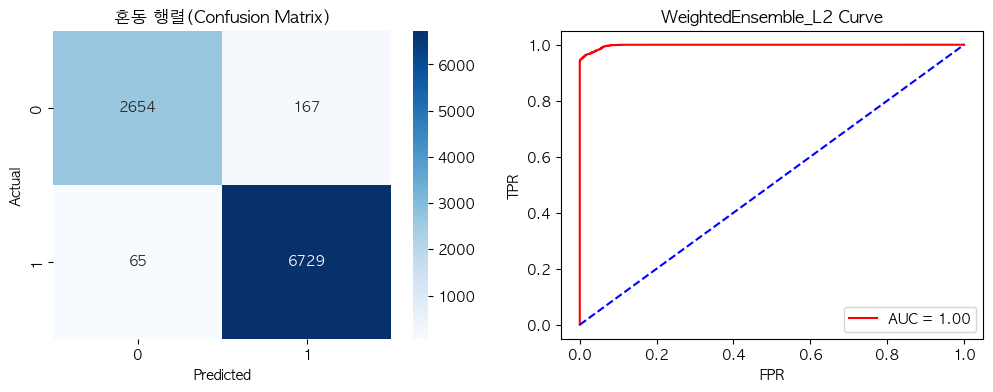

In [588]:
## AutoGluon ML로 학습 및 예측, 정확도 출력
from autogluon.tabular import TabularPredictor

# TabularPredictor.fit() 함수는 자동으로 훈련 데이터를 훈련 데이터와 검증 데이터로 분할(기본: 20%)
predictor = TabularPredictor(label='target').fit(train_df) # train dataset 학습시키기
y_pred = predictor.predict(x_test) # test dataset 결과 예측
proba_df = predictor.predict_proba(x_test) 
probs = proba_df.iloc[:, 1].values # 클래스 1의 예측 확률

# 평가지표 계산
accuracy = accuracy_score(y_test, y_pred) # 정확도
precision = precision_score(y_test, y_pred) # 정밀도: 양성이라고 예측한것중 실제 양성의 비율
recall = recall_score(y_test, y_pred) # 재현율(민감도): 실제 양성 중 양성으로 예측된 비율
f1 = f1_score(y_test, y_pred) # f1: 2 * (정밀도*재현율)/(정밀도+재현율)
auc_score = roc_auc_score(y_test, probs)  # AUC 계산 (ROC 곡선 아래의 면적)

# 평가지표 출력
print(f"{predictor.get_model_best()} Metrics")
print(f" - Accuracy: {round(accuracy*100,2)}%")
print(f" - Precision: {round(precision*100,2)}%")
print(f" - Recall: {round(recall*100,2)}%")
print(f" - F1 Score: {round(f1*100,2)}%")
print(f" - AUC: {round(auc_score*100,2)}%")

fig, axs = plt.subplots(1, 2, figsize=(12,4))

# 혼동 행렬(Confusion Matrix)
confusion = confusion_matrix(y_test, y_pred)
# 히트맵으로 시각화
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axs[0])
axs[0].set_ylabel('Actual')
axs[0].set_xlabel('Predicted')
axs[0].set_title('혼동 행렬(Confusion Matrix)')

# ROC 그래프 그리기
fpr, tpr, thresholds = roc_curve(y_test, probs) #fpr, tpr, thresholds 값 변수에 할당
axs[1].plot(fpr, tpr, color='red', label=f'AUC = {auc_score:.2f}') # ROC Curve 그리기
axs[1].plot([0, 1], [0, 1], color='blue', linestyle='--')
axs[1].set_title(f'{predictor.get_model_best()} Curve')
axs[1].set_xlabel('FPR')
axs[1].set_ylabel('TPR')
axs[1].legend(loc="lower right")

# 최적의 threshold 값 찾기
optimal_idx = np.argmax(tpr - fpr) # tpr-fpr 차이가 가장 큰 인덱스 찾기
optimal_threshold = thresholds[optimal_idx] # 찾은 인덱스에 해당하는 threshold
# optimal threshold 값을 사용하여 예측
y_pred_optimal = np.where(probs > optimal_threshold, 1, 0)
# 새로운 예측 값을 사용하여 정확도 계산
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f'threshold {optimal_threshold:.2f} -> Accuracy : {round(accuracy_optimal*100, 2)}%')

plt.show()


In [589]:
# 학습된 모델 결과 보기
leaderboard = predictor.leaderboard(test_df)
leaderboard

                  model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              LightGBM    0.975975   0.978164        0.006620       0.003937   0.717342                 0.006620                0.003937           0.717342            1       True          4
1   WeightedEnsemble_L2    0.975871   0.979501        0.113267       0.034211  11.286460                 0.001650                0.001837           0.466986            2       True         14
2               XGBoost    0.973895   0.976827        0.017389       0.006329   0.782644                 0.017389                0.006329           0.782644            1       True         11
3              CatBoost    0.972959   0.976381        0.006967       0.002807   1.724624                 0.006967                0.002807           1.724624            1       True          7
4       NeuralNetFastAI    0.972959   0.

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.975975,0.978164,0.006620,0.003937,0.717342,0.006620,0.003937,0.717342,1,True,4
1,WeightedEnsemble_L2,0.975871,0.979501,0.113267,0.034211,11.286460,0.001650,0.001837,0.466986,2,True,14
2,XGBoost,0.973895,0.976827,0.017389,0.006329,0.782644,0.017389,0.006329,0.782644,1,True,11
3,CatBoost,0.972959,0.976381,0.006967,0.002807,1.724624,0.006967,0.002807,1.724624,1,True,7
4,NeuralNetFastAI,0.972959,0.976827,0.049333,0.011412,7.902331,0.049333,0.011412,7.902331,1,True,10
5,LightGBMLarge,0.972127,0.970143,0.006104,0.003862,1.586293,0.006104,0.003862,1.586293,1,True,13
6,LightGBMXT,0.971295,0.974599,0.038275,0.010696,1.417157,0.038275,0.010696,1.417157,1,True,3
7,RandomForestEntr,0.966823,0.963904,0.068880,0.030922,1.129668,0.068880,0.030922,1.129668,1,True,6
8,RandomForestGini,0.965263,0.964349,0.079183,0.030120,1.266040,0.079183,0.030120,1.266040,1,True,5
9,ExtraTreesEntr,0.964951,0.963012,0.110749,0.033379,0.503139,0.110749,0.033379,0.503139,1,True,9


<Axes: >

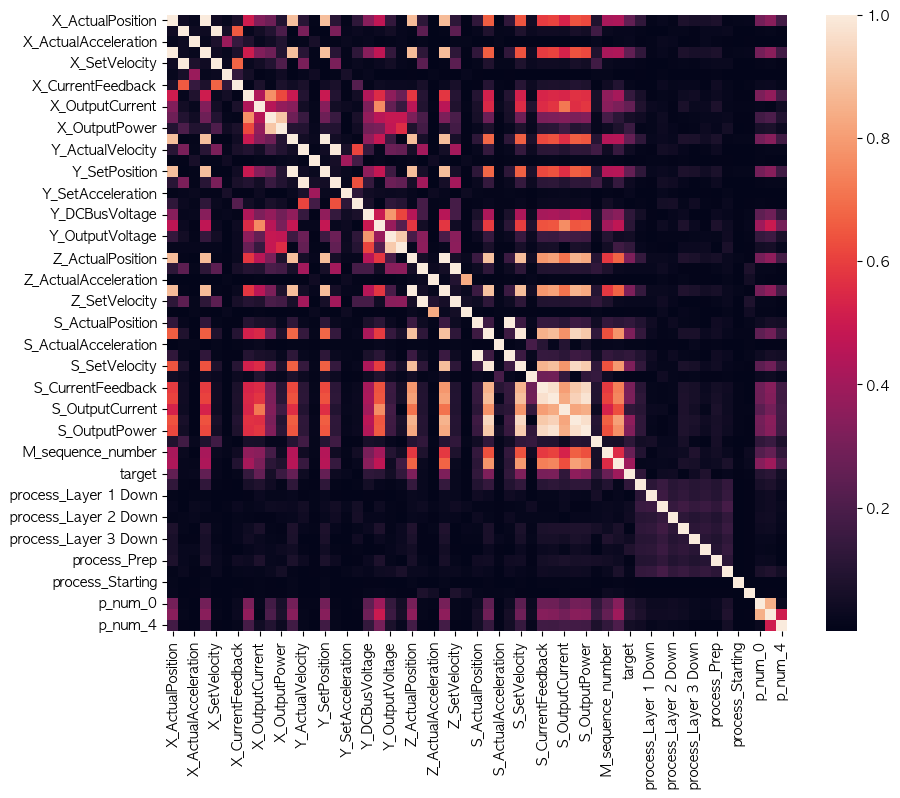

In [590]:
plt.figure(figsize=(10,8))
train_corr = abs(train_df.corr())
sns.heatmap(train_corr)

In [591]:
train_corr.target.sort_values(ascending=False).head(20)

target                1.000000
M_CURRENT_FEEDRATE    0.394013
S_OutputVoltage       0.356811
S_OutputPower         0.325377
S_SetVelocity         0.319454
Z_SetPosition         0.319212
Z_ActualPosition      0.319188
S_ActualVelocity      0.317865
S_DCBusVoltage        0.311237
S_CurrentFeedback     0.305231
M_sequence_number     0.267537
Y_ActualPosition      0.261364
Y_SetPosition         0.261357
X_OutputCurrent       0.258112
X_ActualPosition      0.252367
X_SetPosition         0.252231
X_OutputPower         0.156174
X_DCBusVoltage        0.138821
S_SetPosition         0.132415
S_ActualPosition      0.132375
Name: target, dtype: float64

In [594]:
df.M_CURRENT_FEEDRATE.unique()
df.groupby(['target', 'M_CURRENT_FEEDRATE']).count()

X_ActualPosition  X_ActualVelocity  \
target M_CURRENT_FEEDRATE                                       
0      6                               1852              1852   
       12                               512               512   
       15                               418               418   
       20                              2221              2221   
       50                              4400              4400   
1      3                              13754             13754   
       6                               3349              3349   
       20                              1197              1197   
       50                              4345              4345   

                           X_ActualAcceleration  X_SetPosition  X_SetVelocity  \
target M_CURRENT_FEEDRATE                                                       
0      6                                   1852           1852           1852   
       12                                   512            512            512   
       15                                   418            418            418   
       20                                  2221           2221           2221   
       50                                  4400           4400           4400   
1      3                                  13754          13754          13754   
       6                                   3349           3349           3349   
       20                                  1197           1197           1197   
       50                                  4345           4345           4345   

                           X_SetAcceleration  X_CurrentFeedback  \
target M_CURRENT_FEEDRATE                                         
0      6                                1852               1852   
       12                                512                512   
       15                                418                418   
       20                               2221               2221   
       50                               4400               4400   
1      3                               13754              13754   
       6                                3349               3349   
       20                               1197               1197   
       50                               4345               4345   

                           X_DCBusVoltage  X_OutputCurrent  X_OutputVoltage  \
target M_CURRENT_FEEDRATE                                                     
0      6                             1852             1852             1852   
       12                             512              512              512   
       15                             418              418              418   
       20                            2221             2221             2221   
       50                            4400             4400             4400   
1      3                            13754            13754            13754   
       6                             3349             3349             3349   
       20                            1197             1197             1197   
       50                            4345             4345             4345   

                           ...  process_Layer 2 Up  process_Layer 3 Down  \
target M_CURRENT_FEEDRATE  ...                                             
0      6                   ...                1852                  1852   
       12                  ...                 512                   512   
       15                  ...                 418                   418   
       20                  ...                2221                  2221   
       50                  ...                4400                  4400   
1      3                   ...               13754                 13754   
       6                   ...                3349                  3349   
       20                  ...                1197                  1197   
       50                  ...                4345 

/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression metrics
 - Accuracy: 77.85%
 - Precision: 80.65%
 - Recall: 90.31%
 - F1 Score: 85.21%
 - AUC: 81.01%
 - threshold 0.73 -> Accuracy : 75.66%


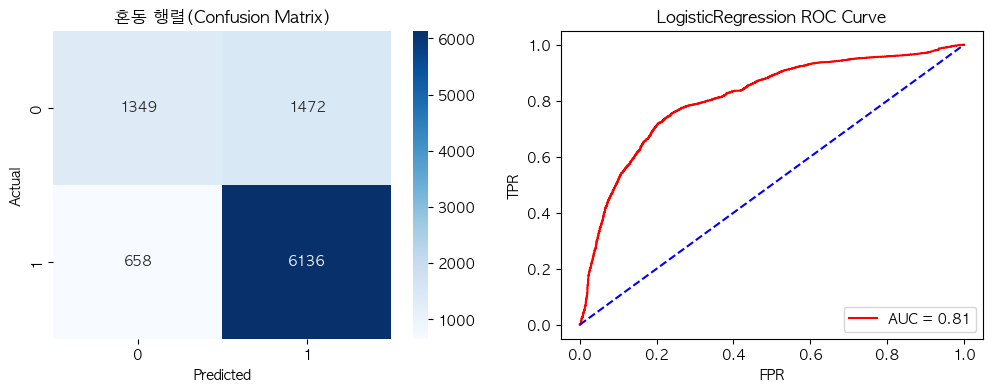

In [595]:
## logistic regression

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)  # 최대 반복 횟수를 설정
model.fit(x_train, y_train)
y_pred = model.predict(x_test) # test dataset 결과 예측
probs = model.predict_proba(x_test)[:, 1]  # 클래스 1에 대한 예측 확률

# 평가지표 계산
accuracy = accuracy_score(y_test, y_pred) # 정확도
precision = precision_score(y_test, y_pred) # 정밀도: 양성이라고 예측한것중 실제 양성의 비율
recall = recall_score(y_test, y_pred) # 재현율(민감도): 실제 양성 중 양성으로 예측된 비율
f1 = f1_score(y_test, y_pred) # f1: 2 * (정밀도*재현율)/(정밀도+재현율)
auc_score = roc_auc_score(y_test, probs)  # AUC 계산 (ROC 곡선 아래의 면적)

# 평가지표 출력
print(f"Logistic Regression metrics")
print(f" - Accuracy: {round(accuracy*100,2)}%")
print(f" - Precision: {round(precision*100,2)}%")
print(f" - Recall: {round(recall*100,2)}%")
print(f" - F1 Score: {round(f1*100,2)}%")
print(f" - AUC: {round(auc_score*100,2)}%")

fig, axs = plt.subplots(1, 2, figsize=(12,4))

# 혼동 행렬(Confusion Matrix)
confusion = confusion_matrix(y_test, y_pred)
# 히트맵으로 시각화
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axs[0])
axs[0].set_ylabel('Actual')
axs[0].set_xlabel('Predicted')
axs[0].set_title('혼동 행렬(Confusion Matrix)')

# ROC 그래프 그리기
fpr, tpr, thresholds = roc_curve(y_test, probs) #fpr, tpr, thresholds 값 변수에 할당
axs[1].plot(fpr, tpr, color='red', label=f'AUC = {auc_score:.2f}') # ROC Curve 그리기
axs[1].plot([0, 1], [0, 1], color='blue', linestyle='--')
axs[1].set_title('LogisticRegression ROC Curve')
axs[1].set_xlabel('FPR')
axs[1].set_ylabel('TPR')
axs[1].legend(loc="lower right")

# 최적의 threshold 값 찾기
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
# 확률 값을 바탕으로 Optimal threshold 값을 사용하여 예측 수행
y_pred_optimal = np.where(probs > optimal_threshold, 1, 0)
# 새로운 예측 값을 사용하여 정확도 계산
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f' - threshold {round(optimal_threshold,2)} -> Accuracy : {round(accuracy_optimal*100, 2)}%')

plt.show()

Epoch 1/100
1150/1150 [==============================] - 3s 2ms/step - loss: 0.5482 - sparse_categorical_accuracy: 0.7283 - val_loss: 0.5841 - val_sparse_categorical_accuracy: 0.7325
Epoch 2/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.5198 - sparse_categorical_accuracy: 0.7492 - val_loss: 1.1199 - val_sparse_categorical_accuracy: 0.3888
Epoch 3/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.5064 - sparse_categorical_accuracy: 0.7515 - val_loss: 0.7856 - val_sparse_categorical_accuracy: 0.7115
Epoch 4/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.4973 - sparse_categorical_accuracy: 0.7596 - val_loss: 0.6421 - val_sparse_categorical_accuracy: 0.6516
Epoch 5/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.4917 - sparse_categorical_accuracy: 0.7623 - val_loss: 0.4992 - val_sparse_categorical_accuracy: 0.7489
Epoch 6/100
1150/1150 [==============================] - 2s 2ms/step - loss: 0.4820 -

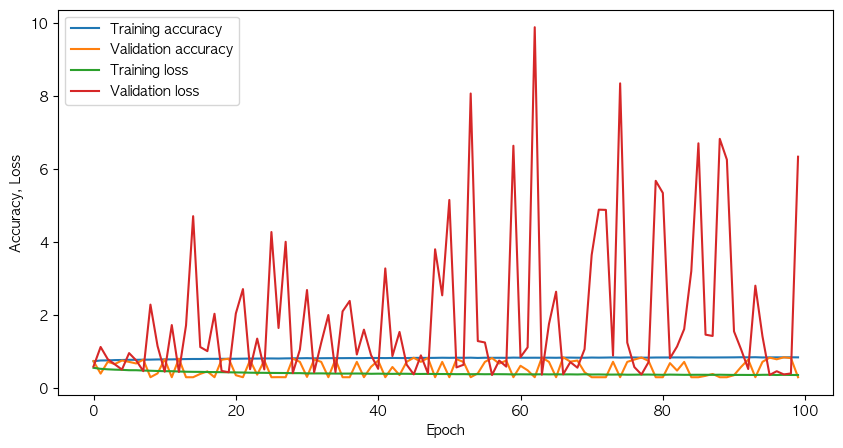

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 56, 30)            120       
                                                                 
 batch_normalization_3 (Batc  (None, 56, 30)           120       
 hNormalization)                                                 
                                                                 
 conv1d_4 (Conv1D)           (None, 56, 30)            2730      
                                                                 
 batch_normalization_4 (Batc  (None, 56, 30)           120       
 hNormalization)                                                 
                                                                 
 conv1d_5 (Conv1D)           (None, 56, 30)            2730      
                                                                 
 batch_normalization_5 (Batc  (None, 56, 30)          

In [597]:
## CNN 학습 및 예측 결과

# CNN 학습을 위해 데이터 shape 변환
x_train_exp = np.expand_dims(x_train, -1) # x_train 배열의 마지막 차원에 새로운 축을 추가
x_test_exp = np.expand_dims(x_test, -1) # x_test 배열의 마지막 차원에 새로운 축을 추가

# 하이퍼파라미터 설정
epoch = 100 # 학습 반복 횟수
act = 'LeakyReLU' # 활성화 함수
opt = 'adam' # optimizer
filter = 30 # Conv1D Layer의 filter수
batch = 16 # batch size
val_rate = 0.18 # 검증데이터 비율
kernel = 3 # filter의 kernel size

# 모델 정의(구조)

def make_cnn_model():
    model = Sequential()
    # Conv1D 1Layer
    model.add(Conv1D(filters=filter, kernel_size=kernel, activation=act,
                    padding='same', input_shape=(56, 1)))
    model.add(BatchNormalization()) # batch 데이터의 분포를 정규화

    # Conv1D 2Layer
    model.add(Conv1D(filters=filter, kernel_size=kernel, activation=act,
                    padding='same'))
    model.add(BatchNormalization()) # batch 데이터의 분포를 정규화

    # Conv1D 3Layer
    model.add(Conv1D(filters=filter, kernel_size=kernel, activation=act,
                    padding='same'))
    model.add(BatchNormalization()) # batch 데이터의 분포를 정규화
    
    # GlobalAveragePooling1D Layer
    model.add(GlobalAveragePooling1D())
    # - 각 feature map의 평균을 계산하여 차원을 축소
    # - Flatten() 대신 사용하여 파라미터 수를 줄이고 과적합을 방지
    
    # Dense Layer
    model.add(Dense(2, activation='softmax'))
    
    return model

cnn_model = make_cnn_model() # 모델 초기화

# 모델 컴파일
cnn_model.compile(optimizer=opt, # optimizer: 학습 최적화 알고리즘
                loss='sparse_categorical_crossentropy', # 사용할 손실 함수
                metrics=['sparse_categorical_accuracy']) # 모델의 평가 지표

# monitor 지표를 기준으로 베스트 모델을 저장
callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True,
                    monitor='val_sparse_categorical_accuracy', mode='max')
                    ]

history = cnn_model.fit(x_train_exp, y_train, # 학습데이터, 라벨
                        batch_size=batch, # batch 크기 지정
                        validation_split=val_rate, # 검증용 데이터의 비율 지정
                        epochs=epoch, # 학습 반복 횟수
                        callbacks=callbacks) # 검증 정확도가 올라갈때만 모델 저장

# 훈련/검증 정확도 최대값과 해당 인덱스를 변수에 할당
max_train_accuracy = max(history.history['sparse_categorical_accuracy'])
max_val_accuracy = max(history.history['val_sparse_categorical_accuracy'])
max_tra_acc_idx = np.argmax(history.history['sparse_categorical_accuracy']) + 1
max_val_acc_idx = np.argmax(history.history['val_sparse_categorical_accuracy']) + 1

# 훈련/검증 loss 최소값과 해당 인덱스를 변수에 할당
min_train_loss = min(history.history['loss'])
min_val_loss = min(history.history['val_loss'])
min_tra_loss_idx = np.argmin(history.history['loss']) + 1
min_val_loss_idx = np.argmin(history.history['val_loss']) + 1

# 훈련/검증 정확도 최대값과 해당 인덱스 출력, loss 최소값과 해당 인덱스 출력
print(f'Max train acc : {max_tra_acc_idx}_epoch_{max_train_accuracy}')
print(f'Max val acc: {max_val_acc_idx}_epoch_{max_val_accuracy}')
print(f'Min train loss : {min_tra_loss_idx}_epoch_{min_train_loss}')
print(f'Min val loss: {min_val_loss_idx}_epoch_{min_val_loss}')

#  베스트 모델로 test dataset 평가 (베스트 모델은 callbacks에 설정 됨)
model = load_model('best_model.h5')
loss_cnn, acc_cnn = model.evaluate(x_test_exp, y_test)
print('test acc ', acc_cnn) # 정확도 출력
print('test loss ', loss_cnn) # loss 출력

# 클래스별 예측 확률, 예측 값
probs = model.predict(x_test_exp)[:, 1] # 예측 결과가 클래스 1에 속할 확률
y_pred = np.argmax(model.predict(x_test_exp), axis=1) # 예측 값

# 평가지표 계산
accuracy = accuracy_score(y_test, y_pred) # 정확도 (acc_cnn 과 동일함)
precision = precision_score(y_test, y_pred) # 정밀도: 양성이라고 예측한것중 실제 양성의 비율
recall = recall_score(y_test, y_pred) # 재현율(민감도): 실제 양성 중 양성으로 예측된 비율
f1 = f1_score(y_test, y_pred) # f1: 2 * (정밀도*재현율)/(정밀도+재현율)
auc_score = roc_auc_score(y_test, probs)  # AUC 계산 (ROC 곡선 아래의 면적)

# 평가지표 출력
print(f"CNN Metrics")
print(f" - Accuracy: {round(accuracy*100,2)}%")
print(f" - Precision: {round(precision*100,2)}%")
print(f" - Recall: {round(recall*100,2)}%")
print(f" - F1 Score: {round(f1*100,2)}%")
print(f" - AUC: {round(auc_score*100,2)}%")

## 학습데이터, 검증데이터의 정확도, loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(history.history['sparse_categorical_accuracy'], label='Training accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.ylabel('Accuracy, Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# 모델 구조 / 파라미터 개수 확인
model.summary()


In [ ]:
## 측정값 아닌건 전부 원핫인코딩

# 데이터 전처리
# 1. 원본 그대로 (48col + alpha)
# 2. 클래스 숫자 맞춰서
# 3. 공정 미완료품 삭제
#    -> 목적은 결과에 영향을 주는 공정 조건값을 찾는거
#    -> 공정 미완료품은 공정 조건값에 상관없이 단순히 공정상태에 따라 라벨을 0으로 부여했기 때문에
#    -> 올바른 공정 조건을 학습하는데 노이즈가 될 수 있음
# 4. 공정 미완료품 삭제후 클래스 숫자 맞춰서
# 5. 데이터 스케일링
# 6. 48col만 사용